<a href="https://colab.research.google.com/github/michelmachado1985/Phyton-iniciantes/blob/main/Classifica%C3%A7%C3%A3o_%C3%81rvores_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Machine Learning***

In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# A base veio do https://www.kaggle.com/
base_diabetes = pd.read_csv('/content/diabetes_prediction_dataset.csv')
base_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
#Verificar se há valores nulos no dataset
base_diabetes.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
# Excluindo a coluna smoking_history, seria necessário fazer um tratamento e
# transformar o campo em numerico.
base_diabetes = base_diabetes.drop(columns=['smoking_history'])

In [ ]:
base_diabetes.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0


In [ ]:
#Converter a coluna Gender que está com o tipo object pata numerico.
base_diabetes["gender"] = pd.to_numeric(base_diabetes["gender"], errors='coerce')

In [ ]:
#Verificando os tipos de dados, pois para usar os dados para classificação eles precisam ser numericos.
base_diabetes.dtypes

,0
gender,float64
age,float64
hypertension,int64
heart_disease,int64
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [ ]:
#dividindo a base entre classificadores
X_base_diabetes = base_diabetes.iloc[:, 0:6].values

In [ ]:
X_base_diabetes

array([[ 0.  , 80.  ,  0.  ,  1.  , 25.19,  6.6 ],
       [ 0.  , 54.  ,  0.  ,  0.  , 27.32,  6.6 ],
       [ 1.  , 28.  ,  0.  ,  0.  , 27.32,  5.7 ],
       ...,
       [ 1.  , 66.  ,  0.  ,  0.  , 27.83,  5.7 ],
       [ 0.  , 24.  ,  0.  ,  0.  , 35.42,  4.  ],
       [ 0.  , 57.  ,  0.  ,  0.  , 22.43,  6.6 ]])

In [ ]:
#Previsores
Y_base_diabetes = base_diabetes.iloc[:, 7].values


In [ ]:
Y_base_diabetes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
type(Y_base_diabetes)

numpy.ndarray

### **Escalonamento dos valores**

In [ ]:
#Para melhores resultados é necessário que os valores estejam na mesma escala de valor.
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_base_diabetes = scaler_census.fit_transform(X_base_diabetes)

In [ ]:
X_base_diabetes

array([[-8.41175470e-01,  1.69270354e+00, -2.84439447e-01,
         4.93637859e+00, -3.21055792e-01,  1.00170572e+00],
       [-8.41175470e-01,  5.38006427e-01, -2.84439447e-01,
        -2.02577655e-01, -1.15583678e-04,  1.00170572e+00],
       [ 1.18881260e+00, -6.16690686e-01, -2.84439447e-01,
        -2.02577655e-01, -1.15583678e-04,  1.61108022e-01],
       ...,
       [ 1.18881260e+00,  1.07094356e+00, -2.84439447e-01,
        -2.02577655e-01,  7.67292549e-02,  1.61108022e-01],
       [-8.41175470e-01, -7.94336396e-01, -2.84439447e-01,
        -2.02577655e-01,  1.22036126e+00, -1.42668764e+00],
       [-8.41175470e-01,  6.71240710e-01, -2.84439447e-01,
        -2.02577655e-01, -7.36921977e-01,  1.00170572e+00]])

### **Divisão das bases em treinamento e teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Divisão de base de treinamento e teste
X_base_diabetes_treinamento, X_base_diabetes_teste, Y_base_diabetes_treinamento, Y_base_diabetes_teste = train_test_split(X_base_diabetes, Y_base_diabetes, test_size = 0.25, random_state = 0)

In [ ]:
X_base_diabetes_treinamento.shape

(75000, 6)

In [ ]:
Y_base_diabetes_treinamento.shape

(75000,)

In [ ]:
X_base_diabetes_teste.shape, Y_base_diabetes_teste.shape

((25000, 6), (25000,))

In [ ]:
import pickle

In [ ]:
#salvando as bases de teste e treinamento no arquivo PKL.
with open('diabetes.pkl', mode = 'wb') as f:
  pickle.dump([X_base_diabetes_treinamento, X_base_diabetes_teste, Y_base_diabetes_treinamento, Y_base_diabetes_teste ], f)

**Árvores de decisão**

In [ ]:
#Baixando o Classificador
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pickle
with open('diabetes.pkl', 'rb') as f:
  X_base_diabetes_treinamento, X_base_diabetes_teste, Y_base_diabetes_treinamento, Y_base_diabetes_teste  = pickle.load(f)

In [ ]:
#Fazendo o treinamento do Classificador
arvore_diabetes = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_diabetes.fit(X_base_diabetes_treinamento, Y_base_diabetes_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Fazendo o teste com arquivos de teste
previsoes = arvore_diabetes.predict(X_base_diabetes_teste)
previsoes

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
Y_base_diabetes_teste

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:

from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Verificando quantos a quantidade de acertos no teste, nesse caso conseguimos
# acertar 92,9%.
accuracy_score(Y_base_diabetes_teste, previsoes)

0.92956

0.92956

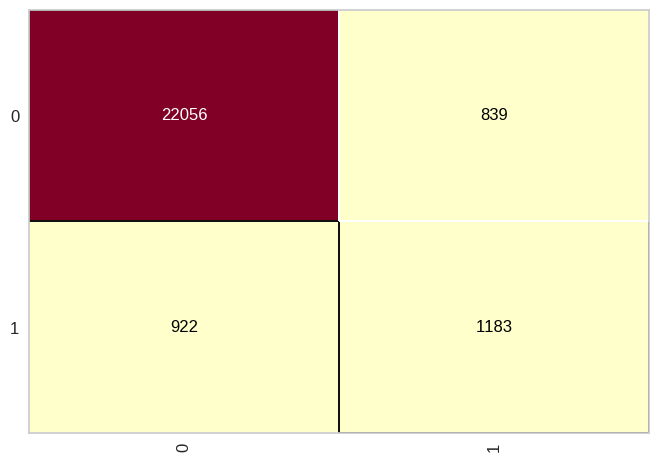

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_diabetes)
cm.fit(X_base_diabetes_treinamento, Y_base_diabetes_treinamento)
cm.score(X_base_diabetes_teste, Y_base_diabetes_teste)

In [ ]:
print(classification_report(Y_base_diabetes_teste, previsoes))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22895
           1       0.59      0.56      0.57      2105

    accuracy                           0.93     25000
   macro avg       0.77      0.76      0.77     25000
weighted avg       0.93      0.93      0.93     25000



In [ ]:
arvore_diabetes.classes_

array([0, 1])

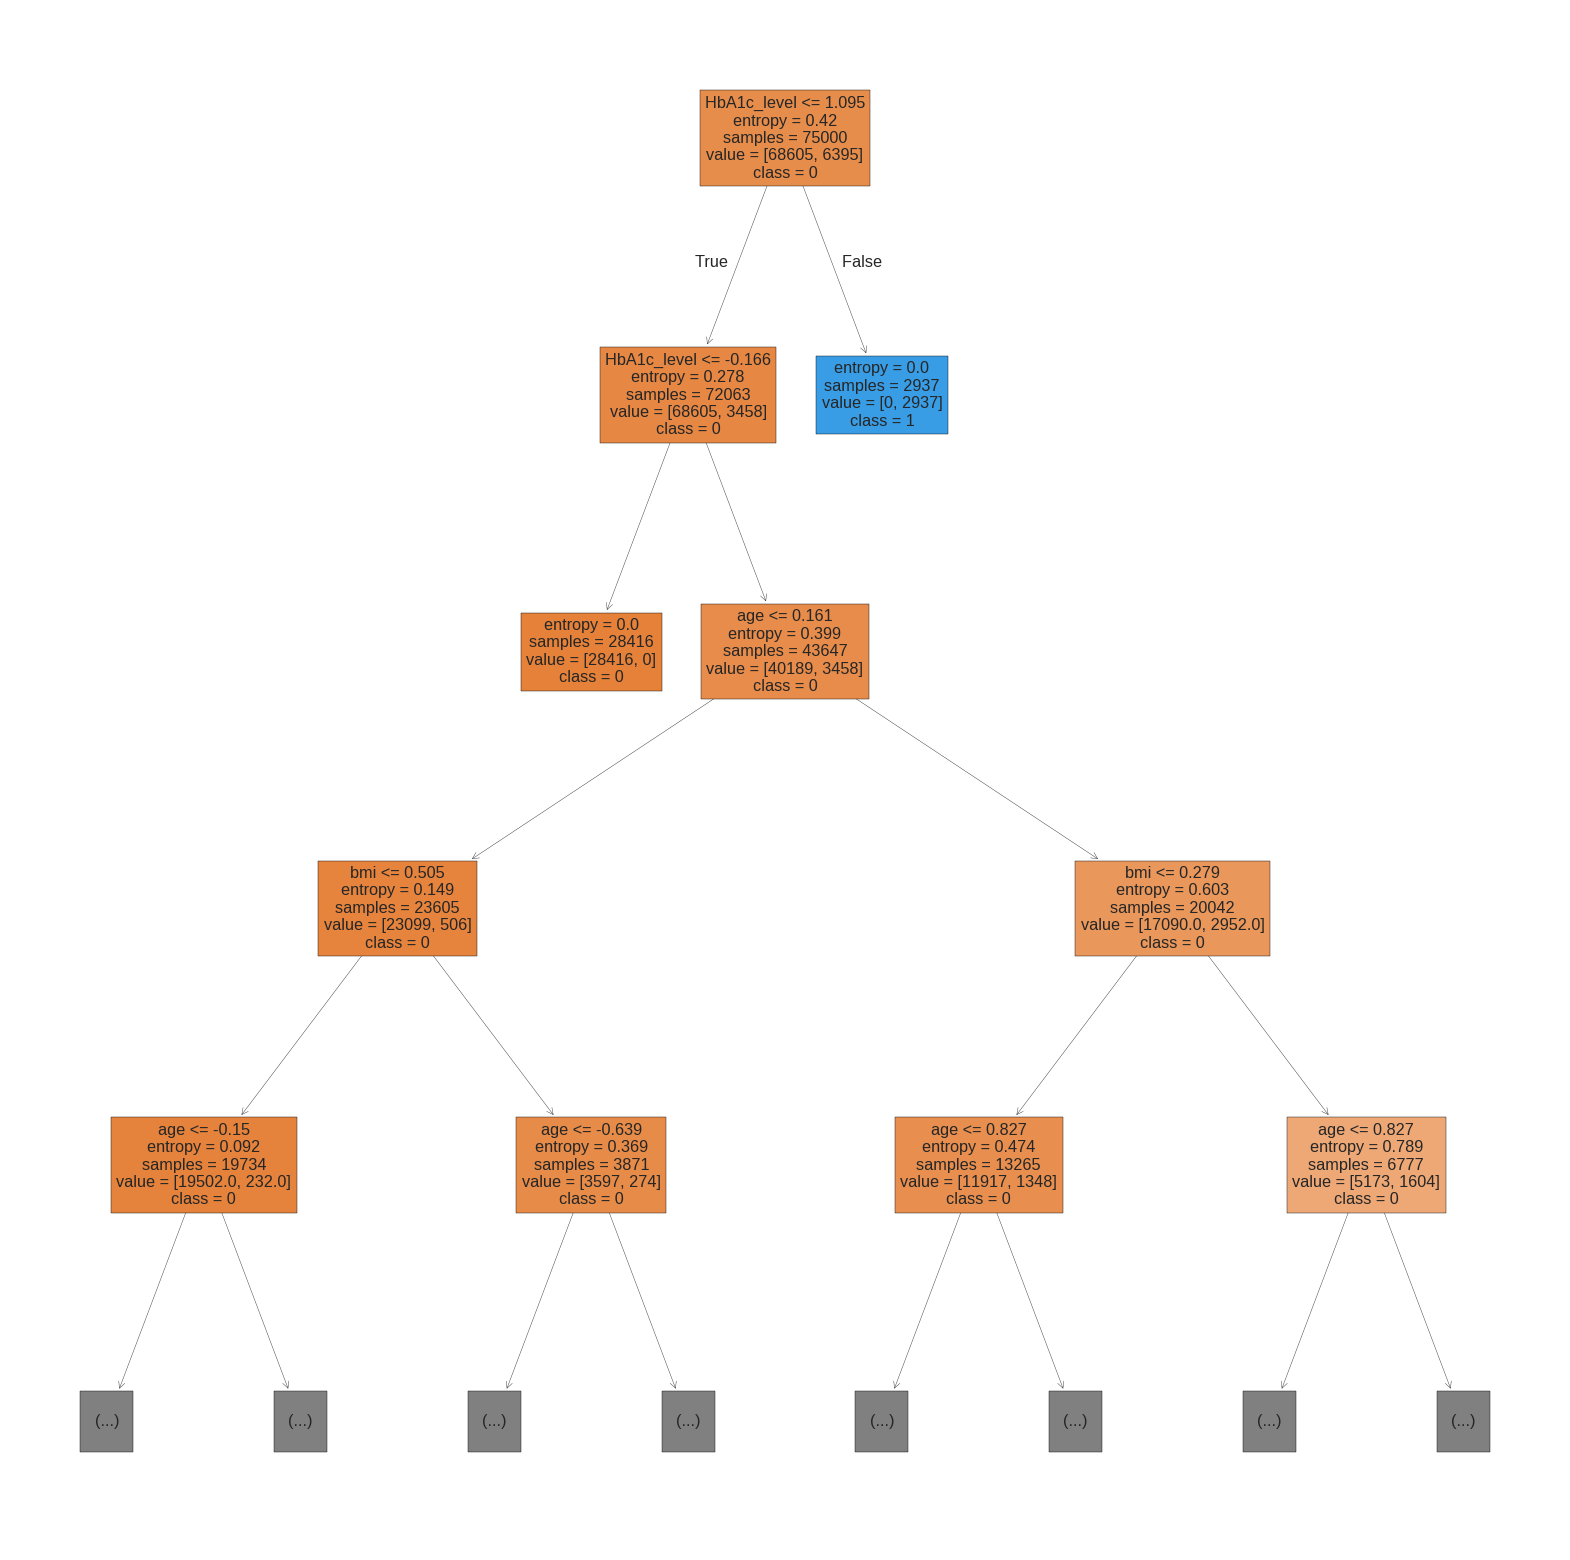

In [ ]:
#Grafico com exemplificando o a tomanda de decisão.
from sklearn import tree
previsores = ['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level',  ]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_diabetes, feature_names=previsores, class_names=['0','1'], filled=True, max_depth=4);
fig.savefig('arvore_diabetes.png')